What are ACL tears known to cause in NFL Players? They have a lengthy recovery time, result in decreased perforamnce, greater risk of re injury, and can have long term affects (ex: Todd gurley). I want to look at skill players metrics that measure the individual performance of a skill players. The most important part of this was finding stats that represent a players performance than team. For example: you can always blame offensive scheme & coaches, Quarterback play, Offensive Line play and more. I will be looking at different metrics for skill players to observe how they played after coming off an ACL injury. I will use a players data from a year before if they had torn their acl early in the season. I hope you find this data useful!

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
# opening up dataframes 
df_2022 = pd.read_csv('advanced-rb-csvs/Advanced_2022.csv')
df_2023 = pd.read_csv('advanced-rb-csvs/Advanced_2023.csv')
df_2021 = pd.read_csv('advanced-rb-csvs/Advanced_2021.csv')
df_2019 = pd.read_csv('advanced-rb-csvs/Advanced_2019.csv')
df_2018 = pd.read_csv('advanced-rb-csvs/Advanced_2018.csv')
df_2017 = pd.read_csv('advanced-rb-csvs/Advanced_2017.csv')

In [3]:
# breece hall rows
bhall_pre_advanced = df_2022.loc[df_2022['Player'] == 'Breece Hall (NYJ)']
bhall_post_advanced = df_2023.loc[df_2023['Player'] == 'Breece Hall (NYJ)']

# setting years and colors for breece hall 
years = ['2022', '2023']
colors = ['blue', 'green']

# for breece hall
ypa = [bhall_pre_advanced['Y/ATT'].iloc[0], bhall_post_advanced['Y/ATT'].iloc[0]]
YAcontactPA = [bhall_pre_advanced["YACON/ATT"].iloc[0], bhall_post_advanced["YACON/ATT"].iloc[0]]
BrokenTCKLPG = [round(bhall_pre_advanced["BRKTKL"].iloc[0] / bhall_pre_advanced["G"].iloc[0], 2), round(bhall_post_advanced["BRKTKL"].iloc[0] / bhall_post_advanced["G"].iloc[0], 2)]
ExplosivePPG = [round(bhall_pre_advanced["10+ YDS"].iloc[0] / bhall_pre_advanced["G"].iloc[0], 2), round(bhall_post_advanced["10+ YDS"].iloc[0] / bhall_post_advanced["G"].iloc[0], 2)]

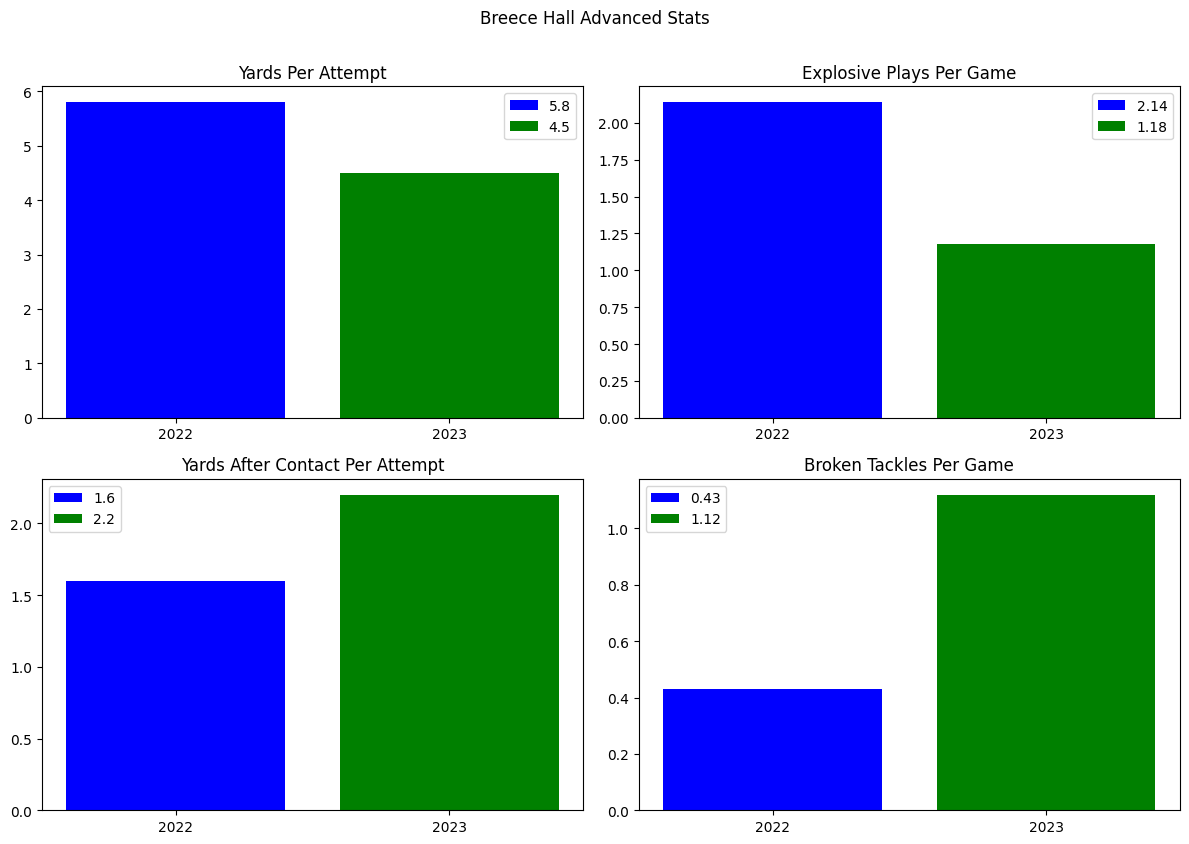

In [4]:
# Create four separate plots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot Y/ATT
axs[0, 0].bar(years, ypa, label=[str(i) for i in ypa], color=colors)
axs[0, 0].set_title('Yards Per Attempt')
axs[0, 0].legend()

# Plot YBCON/ATT
axs[0, 1].bar(years, ExplosivePPG, label=[str(i) for i in ExplosivePPG], color=colors)
axs[0, 1].set_title('Explosive Plays Per Game')
axs[0, 1].legend()

# Plot YACON/ATT
axs[1, 0].bar(years, YAcontactPA, label=[str(i) for i in YAcontactPA], color=colors)
axs[1, 0].set_title('Yards After Contact Per Attempt')
axs[1, 0].legend()

# Plot BRKTKL/G
axs[1, 1].bar(years, BrokenTCKLPG, label=[str(i) for i in BrokenTCKLPG], color=colors)
axs[1, 1].set_title('Broken Tackles Per Game')
axs[1, 1].legend()

# Adjust layout
plt.tight_layout()

fig.suptitle('Breece Hall Advanced Stats', y=1.05)
# Show the plots
plt.savefig('plots/breeceHallACL')
plt.show()

Football & Fantasy Analysis: 

Breece Hall played great after coming off an ACL injury, Hall turned to be a steal in PPR leagues with his price tag being in the 3rd-4th round. He started the season with a snap count which fantasy managers knew would happen. With better quarterback play I can see him playing way better. You could argue a lot of his points came from his mid QBs throwing a lot of checkdowns, however Breece still broke out tons of explosive runs. Hall defintely proved the narrative wrong that ACL tears affect runningbacks evenly with him improving in a lot of metrics despite a stagnant offense including terrible QB and O-line play. 


First I have to say is that Breece Hall is a dog. The Jets offensive line has been terrible for the past couple years and Breece continues to show that he will be one of the top running backs in the league. Despite him tearing his ACL last year his metrics continued to get better. His yards per carry dropping I believe is due to various factors. The first being sample size, Breece Hall only had 80 carries his rookie year before tearing his ACL and this year he had 223 carries. Next, the Jets offense was terrible. 

The QB play was the worst I have seen from a team in a while and watching the jets fail to throw the ball deep down the field limited their play calling. I believe with a rodgers healthy and some O-line fixes over the offseason the jets offense will be a threat.

In [5]:
# Javontae Williams 
Jwilliams_pre_advanced = df_2022.loc[df_2022['Player'] == "Javonte Williams (DEN)"]
Jwilliams_post_advanced = df_2023.loc[df_2023['Player'] == "Javonte Williams (DEN)"]

In [6]:
ypa = [Jwilliams_pre_advanced['Y/ATT'].iloc[0], Jwilliams_post_advanced['Y/ATT'].iloc[0]]
ExplosivePPG = [round(Jwilliams_pre_advanced["10+ YDS"].iloc[0] / Jwilliams_pre_advanced["G"].iloc[0], 2), round(Jwilliams_post_advanced["10+ YDS"].iloc[0] / Jwilliams_post_advanced["G"].iloc[0], 2)]
YAcontactPA = [Jwilliams_pre_advanced["YACON/ATT"].iloc[0], Jwilliams_post_advanced["YACON/ATT"].iloc[0]]
BrokenTCKLPG = [round(Jwilliams_pre_advanced["BRKTKL"].iloc[0] / Jwilliams_post_advanced["G"].iloc[0], 2), round(Jwilliams_post_advanced["BRKTKL"].iloc[0] / Jwilliams_post_advanced["G"].iloc[0], 2)]

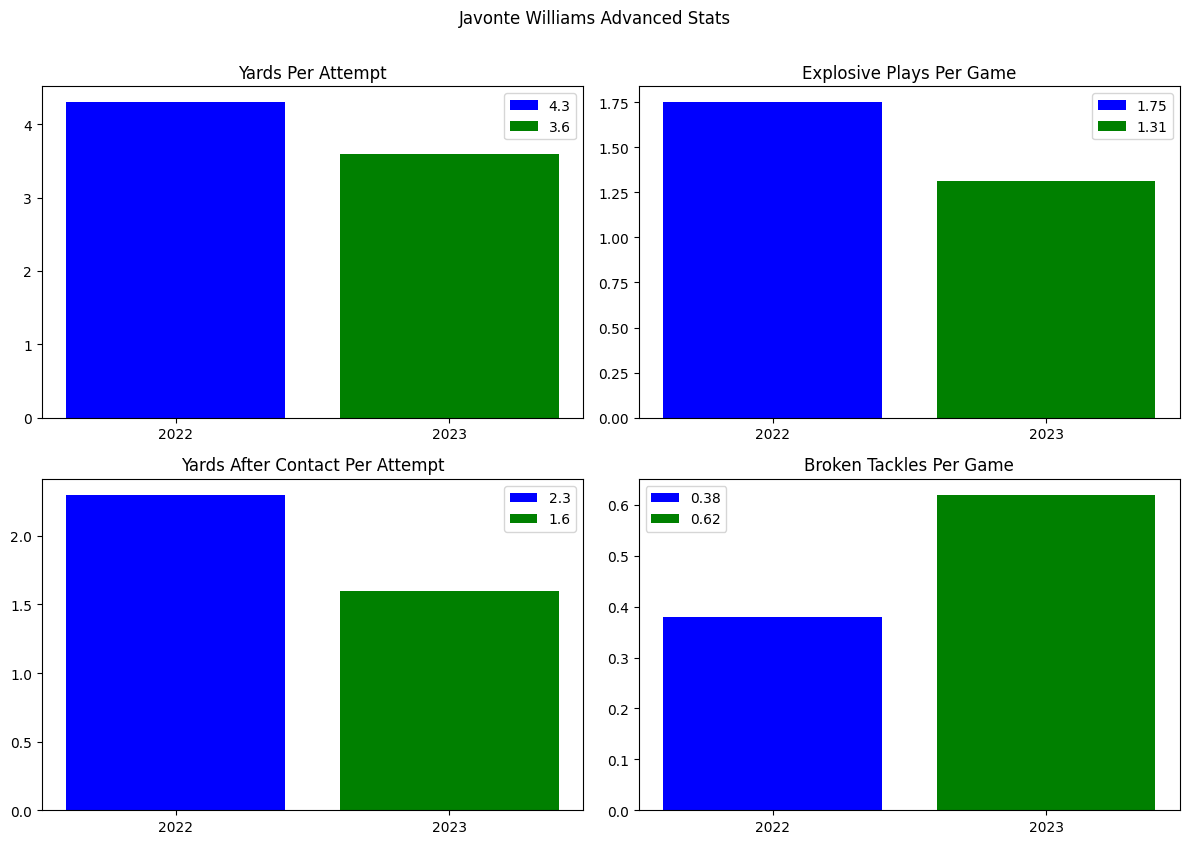

In [7]:
# Create four separate plots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot Y/ATT
axs[0, 0].bar(years, ypa, label=[str(i) for i in ypa], color=colors)
axs[0, 0].set_title('Yards Per Attempt')
axs[0, 0].legend()

# Plot YBCON/ATT
axs[0, 1].bar(years, ExplosivePPG, label=[str(i) for i in ExplosivePPG], color=colors)
axs[0, 1].set_title('Explosive Plays Per Game')
axs[0, 1].legend()

# Plot YACON/ATT
axs[1, 0].bar(years, YAcontactPA, label=[str(i) for i in YAcontactPA], color=colors)
axs[1, 0].set_title('Yards After Contact Per Attempt')
axs[1, 0].legend()

# Plot BRKTKL/G
axs[1, 1].bar(years, BrokenTCKLPG, label=[str(i) for i in BrokenTCKLPG], color=colors)
axs[1, 1].set_title('Broken Tackles Per Game')
axs[1, 1].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
fig.suptitle('Javonte Williams Advanced Stats', y=1.05)
plt.savefig('plots/javonteWilliamsACL')
plt.show()

In [8]:
saquon_pre_advanced = df_2019.loc[df_2019['Player'] == "Saquon Barkley (NYG)"]
saquon_post_advanced = df_2021.loc[df_2021['Player'] == "Saquon Barkley (NYG)"]


ypa = [saquon_pre_advanced['Y/ATT'].iloc[0], saquon_post_advanced['Y/ATT'].iloc[0]]
ExplosivePPG = [round(saquon_pre_advanced["10+ YDS"].iloc[0] / saquon_pre_advanced["G"].iloc[0], 2), round(saquon_post_advanced["10+ YDS"].iloc[0] / saquon_post_advanced["G"].iloc[0], 2)]
YAcontactPA = [saquon_pre_advanced["YACON/ATT"].iloc[0], saquon_post_advanced["YACON/ATT"].iloc[0]]
BrokenTCKLPG = [round(saquon_pre_advanced["BRKTKL"].iloc[0] / saquon_pre_advanced["G"].iloc[0], 2), round(saquon_post_advanced["BRKTKL"].iloc[0] / saquon_post_advanced["G"].iloc[0], 2)]

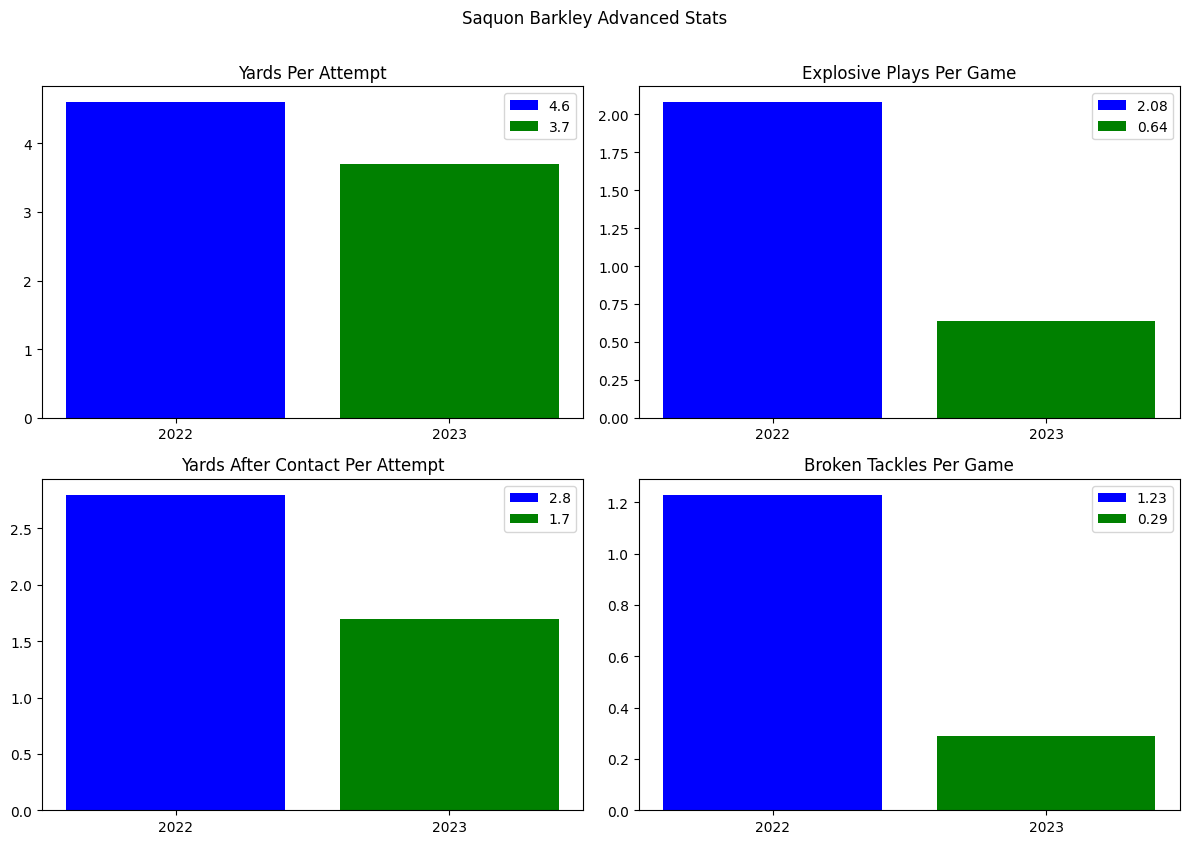

In [9]:
# Create four separate plots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot Y/ATT
axs[0, 0].bar(years, ypa, label=[str(i) for i in ypa], color=colors)
axs[0, 0].set_title('Yards Per Attempt')
axs[0, 0].legend()

# Plot YBCON/ATT
axs[0, 1].bar(years, ExplosivePPG, label=[str(i) for i in ExplosivePPG], color=colors)
axs[0, 1].set_title('Explosive Plays Per Game')
axs[0, 1].legend()

# Plot YACON/ATT
axs[1, 0].bar(years, YAcontactPA, label=[str(i) for i in YAcontactPA], color=colors)
axs[1, 0].set_title('Yards After Contact Per Attempt')
axs[1, 0].legend()

# Plot BRKTKL/G
axs[1, 1].bar(years, BrokenTCKLPG, label=[str(i) for i in BrokenTCKLPG], color=colors)
axs[1, 1].set_title('Broken Tackles Per Game')
axs[1, 1].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
fig.suptitle('Saquon Barkley Advanced Stats', y=1.05)
plt.savefig('plots/SaquonBarkleyACL')
plt.show()

In [10]:
cook_pre = df_2017.loc[df_2017['Player'] == "Dalvin Cook (BAL)"]
cook_post = df_2018.loc[df_2018['Player'] == "Dalvin Cook (BAL)"]


ypa = [cook_pre['Y/ATT'].iloc[0], cook_post['Y/ATT'].iloc[0]]
ExplosivePPG = [round(cook_pre["10+ YDS"].iloc[0] / cook_pre["G"].iloc[0], 2), round(cook_pre["10+ YDS"].iloc[0] / cook_post["G"].iloc[0], 2)]
YAcontactPA = [cook_pre["YACON/ATT"].iloc[0], cook_post["YACON/ATT"].iloc[0]]
BrokenTCKLPG = [round(cook_pre["BRKTKL"].iloc[0] / cook_pre["G"].iloc[0], 2), round(cook_post["BRKTKL"].iloc[0] / cook_post["G"].iloc[0], 2)]

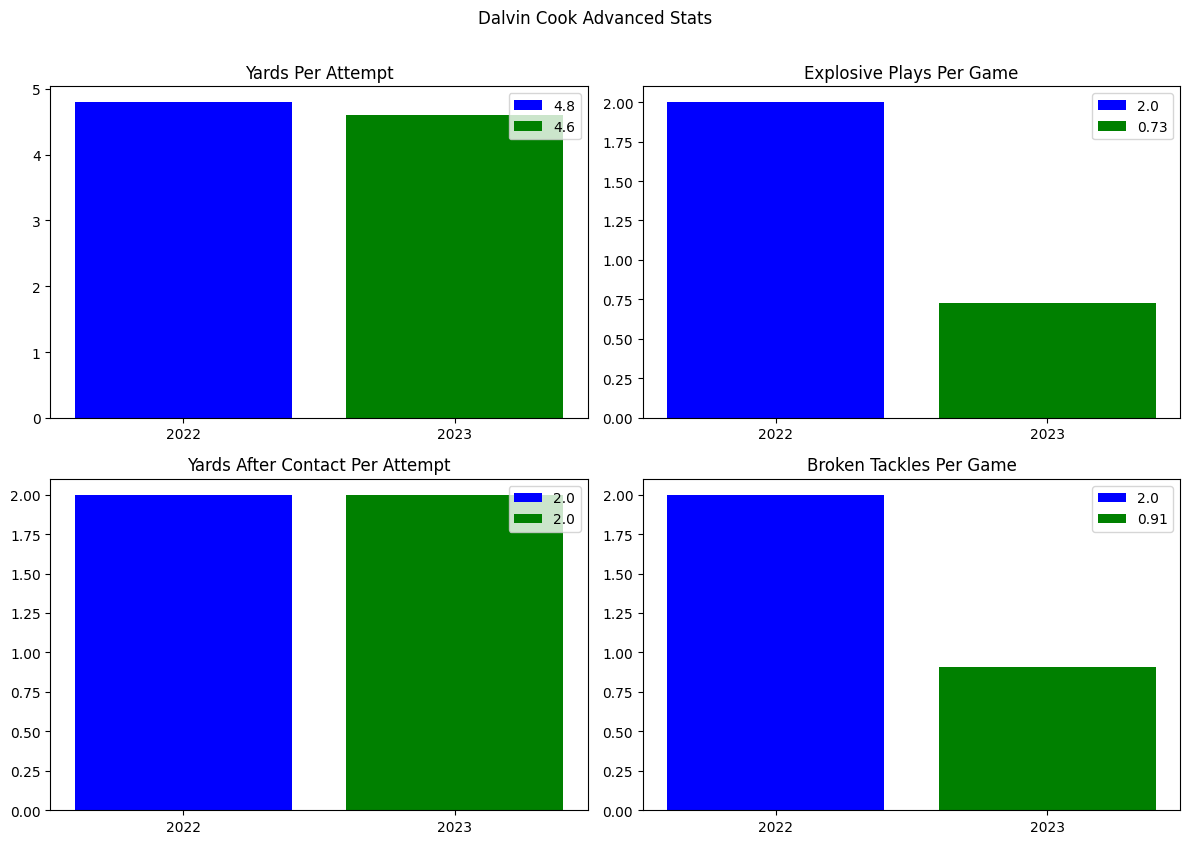

In [11]:
# Create four separate plots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot Y/ATT
axs[0, 0].bar(years, ypa, label=[str(i) for i in ypa], color=colors)
axs[0, 0].set_title('Yards Per Attempt')
axs[0, 0].legend()

# Plot YBCON/ATT
axs[0, 1].bar(years, ExplosivePPG, label=[str(i) for i in ExplosivePPG], color=colors)
axs[0, 1].set_title('Explosive Plays Per Game')
axs[0, 1].legend()

# Plot YACON/ATT
axs[1, 0].bar(years, YAcontactPA, label=[str(i) for i in YAcontactPA], color=colors)
axs[1, 0].set_title('Yards After Contact Per Attempt')
axs[1, 0].legend()

# Plot BRKTKL/G
axs[1, 1].bar(years, BrokenTCKLPG, label=[str(i) for i in BrokenTCKLPG], color=colors)
axs[1, 1].set_title('Broken Tackles Per Game')
axs[1, 1].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
fig.suptitle('Dalvin Cook Advanced Stats', y=1.05)
plt.savefig('plots/DalvinCookACL')
plt.show()